In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings("ignore")


data =pd.read_csv("C:/Users/Shiva Periaswamy/Documents/project/guvi/capstone_project_4_ICM/copper.csv")
data


c:\Users\Shiva Periaswamy\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
data.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
data.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [ ]:

data.index

RangeIndex(start=0, stop=181673, step=1)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce').dt.date
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce')
data['country'] = pd.to_numeric(data['country'], errors='coerce')
data['application'] = pd.to_numeric(data['application'], errors='coerce')
data['thickness'] = pd.to_numeric(data['thickness'], errors='coerce')
data['width'] = pd.to_numeric(data['width'], errors='coerce')
data['material_ref'] = data['material_ref'].str.lstrip('0')
data['product_ref'] = pd.to_numeric(data['product_ref'], errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce').dt.date
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce')

In [ ]:
data.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [ ]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [ ]:
#categorical variables
cols1 = [ 'item type', 'material_ref', 'product_ref', 'status']
print('categorical variables\n',cols1)

#continuous variable
cols2=['quantity tons', 'customer', 'country', 'application', 'thickness', 'width','selling_price']
print('\ncontinuous variables\n',cols2)

categorical variables
 ['item type', 'material_ref', 'product_ref', 'status']

continuous variables
 ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'selling_price']


In [ ]:
# material_ref has large set of null values, so replacing them with unknown 
data['material_ref'].fillna(data['material_ref'].mode()[0], inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected 
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [ ]:
df=data.copy()

<AxesSubplot:>

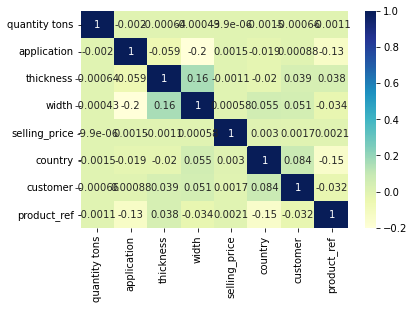

In [ ]:
import seaborn as sns
x=df[['quantity tons','application','thickness','width','selling_price','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [ ]:
for i in cols2:
    print(i,"--",df[i].skew())

quantity tons -- 424.64172262228567
customer -- -149.0892032064066
country -- 0.753583505800692
application -- 0.7243241375567747
thickness -- 303.47159161176114
width -- 0.37484465555785246
selling_price -- 301.3532474673474


In [ ]:
def outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    low_r=(q1-1.5*IQR)
    high_r=(q3+1.5*IQR)
    outliers = df[((df<(low_r)) | (df>(high_r)))]
    return outliers,low_r,high_r

In [ ]:
qt_outlier,qt_low,qt_high=outliers_IQR(df['quantity tons'])

app_outliers,app_low,app_upper=outliers_IQR(df['application'])

thickness_outliers,thickness_low,thickness_upper=outliers_IQR(df['thickness'])

width_outliers,width_low,width_upper=outliers_IQR(df['width'])

selling_outliers,selling_low,selling_upper=outliers_IQR(df['selling_price'])

In [ ]:
min(selling_outliers),max(selling_outliers)

(-1160.0, 100001015.0)

In [ ]:
df['selling_price_out']=df['selling_price']
df['selling_price_out'] = np.where(df['selling_price_out'] >selling_upper, selling_upper,df['selling_price_out'])
df['selling_price_out'] = np.where(df['selling_price_out'] <selling_low, selling_low,df['selling_price_out'])

In [ ]:
df['selling_price_out'].skew()

0.1379691633191169

In [ ]:
df['quantity tons_log']=np.log(df['quantity tons'])

df['thickness_log'] = np.log(df['thickness'])

In [ ]:
df['quantity tons_log'].skew(),df['thickness_log'].skew()

(-0.06878084465036802, 0.3515365138415221)

In [ ]:
df.head(1)


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_out,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,854.0,3.991779,0.693147


In [ ]:
Continues_col_out = ['quantity tons_log','customer','country','application','thickness_log','width','selling_price_out']


In [ ]:
for i in Continues_col_out:
    print(i,"--",df[i].skew())

quantity tons_log -- -0.06878084465036802
customer -- -149.0892032064066
country -- 0.753583505800692
application -- 0.7243241375567747
thickness_log -- 0.3515365138415221
width -- 0.37484465555785246
selling_price_out -- 0.1379691633191169


<AxesSubplot:xlabel='quantity tons'>

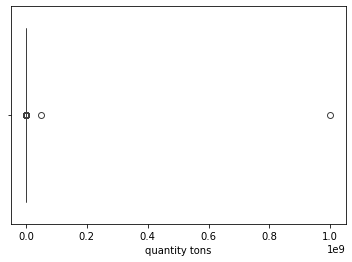

In [ ]:
import seaborn as sns

sns.boxplot(x=df['quantity tons'])


<AxesSubplot:xlabel='quantity tons_log'>

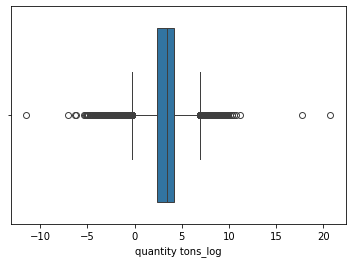

In [ ]:
sns.boxplot(x=df['quantity tons_log'])

In [ ]:
cols_plot=['quantity tons','quantity tons_log',
       'thickness','thickness_log','selling_price','selling_price_out']

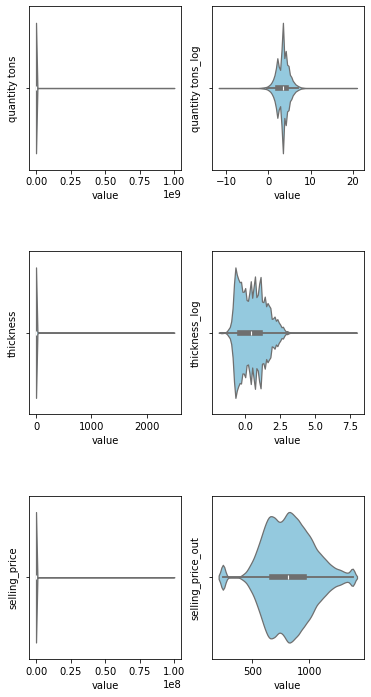

Text(0.5, 0.98, 'VIOLIN PLOT CONTINUOUS VARIABLE')

<Figure size 432x288 with 0 Axes>

In [ ]:
# Select the features for the violin plot
fig, ax = plt.subplots((len(cols_plot)+1)//2, 2, figsize=(6, 12))
ax=ax.ravel()
for i, feature in enumerate(cols_plot):
    sns.violinplot(data=df, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)
#sns.violinplot(data=df, x='selling_price_out', ax=ax[-1], color='skyblue')
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.suptitle("VIOLIN PLOT CONTINUOUS VARIABLE")

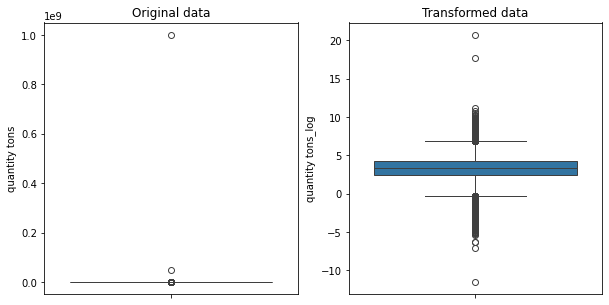

In [ ]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df['quantity tons'], ax=ax[0])
sns.boxplot(df['quantity tons_log'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

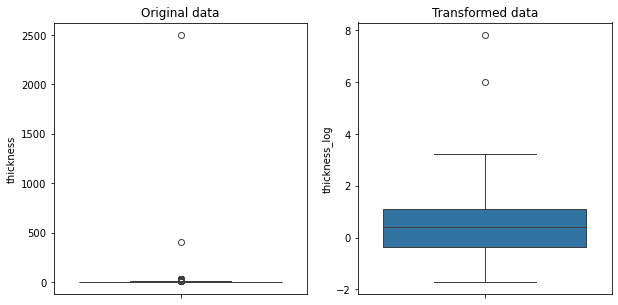

In [ ]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df['thickness'], ax=ax[0])
sns.boxplot(df['thickness_log'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

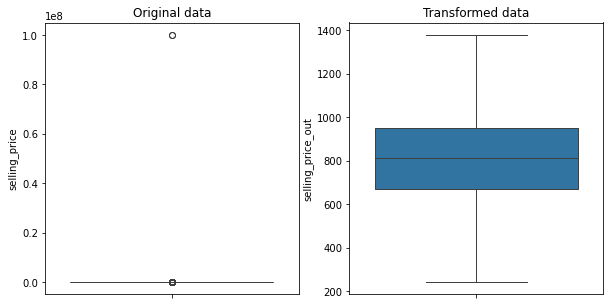

In [ ]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(df['selling_price'], ax=ax[0])
sns.boxplot(df['selling_price_out'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

<AxesSubplot:xlabel='thickness_log', ylabel='Density'>

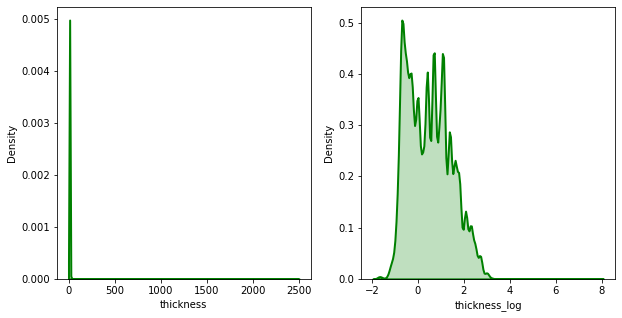

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['thickness'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(df['thickness_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<AxesSubplot:xlabel='quantity tons_log', ylabel='Density'>

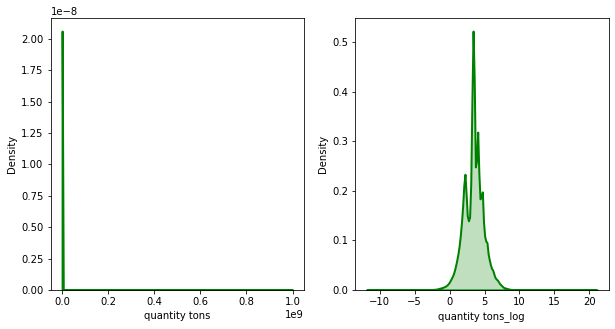

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['quantity tons'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(df['quantity tons_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<AxesSubplot:xlabel='selling_price_out', ylabel='Density'>

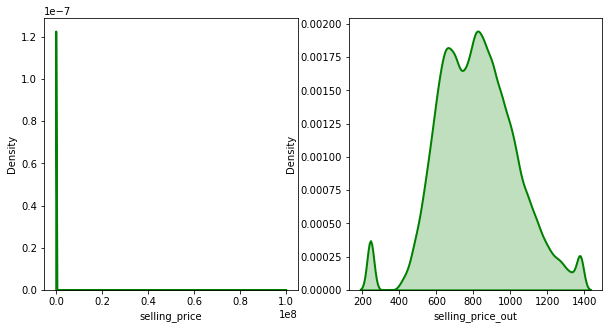

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df['selling_price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(df['selling_price_out'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

In [ ]:
df.isnull().sum()


id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_out    0
quantity tons_log    4
thickness_log        0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# encoding categorical variables
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[['item type']])
X_ohe = ohe.fit_transform(df[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(df[['status']])
X_be = ohe2.fit_transform(df[['status']]).toarray()

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
min(df['quantity tons']),max(df['quantity tons'])

(1e-05, 1000000000.0)

In [ ]:
# independent features after encoding
X = np.concatenate((df[['quantity tons_log', 
                       'application', 
                       'thickness_log', 
                       'width','country',
                       'customer',
                       'product_ref']].values, X_ohe, X_be), axis=1)

y=df['selling_price_out']

NameError: name 'X_ohe' is not defined

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

NameError: name 'X' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
extra_tree_model = ExtraTreesRegressor()

In [ ]:
#training the model
et=extra_tree_model.fit(X_train, y_train)
#evaluting model
predict_val=extra_tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE=mean_absolute_error(y_test,predict_val)
MSE=mean_squared_error(y_test,predict_val)
r2 = r2_score(y_test,predict_val)

print("MAE :",MAE,"\nMSE :",MSE,"\nR2 :",r2)

In [ ]:
# hyperparameters
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=extra_tree_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

NameError: name 'grid_search' is not defined

In [ ]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

NameError: name 'mean_squared_error' is not defined

In [ ]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

NameError: name 'best_model' is not defined

In [ ]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(10), 10, np.log(240), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', (new_pred))

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
df_c = df[df['status'].isin(['Won', 'Lost'])]
df_class=df_c[[ 'customer','country',
               'item type','application','width',
               'product_ref','selling_price_out',
               'quantity tons_log','thickness_log']]
Y=df_c['status']

In [ ]:
len(Y)

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_class[['item type']])
X_ohe = ohe.fit_transform(df_class[['item type']]).toarray()

In [ ]:
be = LabelBinarizer()
be.fit(Y) 
Y_fit = be.fit_transform(Y)

In [ ]:
X = np.concatenate((df_class[[ 'customer','country',
               'application','width',
               'product_ref','selling_price_out',
               'quantity tons_log','thickness_log']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_fit, test_size=0.2, random_state=42)

In [ ]:
extra_tree_model_class = ExtraTreesClassifier()

In [ ]:
extra_tree_model_class.fit(X_train, y_train)

In [ ]:
y_pred = extra_tree_model_class.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'roc_curve' is not defined

In [ ]:
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(extra_tree_model_class, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [ ]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[customer, country, application, width,product_ref,selling_price_out,quantity_tons_log,thickness_log,status]])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = extra_tree_model_class.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')